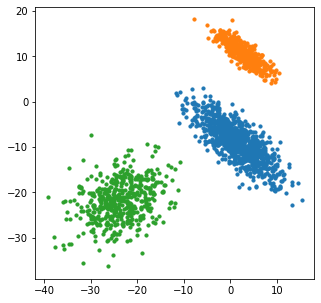

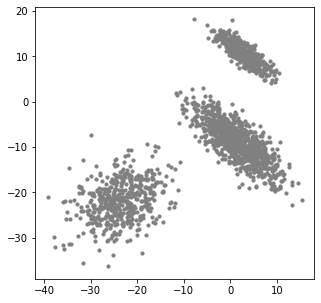

In [9]:
import numpy as np 
import numpy.matlib 
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# rotation
r1 = 10*(np.random.rand(2,2) - 0.5)
r2 = 10*(np.random.rand(2,2) - 0.5)
r3 = 10*(np.random.rand(2,2) - 0.5)

# translation
t1 = 50*(np.random.rand(2,1) - 0.5)t2 = 50*(np.random.rand(2,1) - 0.5)
t3 = 50*(np.random.rand(2,1) - 0.5)

X1 = np.random.randn(2,1000)
X1 = r1.dot(X1) + t1

X2 = np.random.randn(2,500)
X2 = r2.dot(X2) + t2

X3 = np.random.randn(2,500)
X3 = r3.dot(X3) + t3

plt.figure(figsize = (5,5))
plt.scatter(X1[0,:],X1[1,:], s = 10)
plt.scatter(X2[0,:],X2[1,:], s = 10)
plt.scatter(X3[0,:],X3[1,:], s = 10)

X = np.hstack([X1, X2, X3])
np.random.shuffle(X)

plt.figure(figsize = (5,5))
plt.scatter(X[0,:],X[1,:],s = 10,color = "gray")

(0.0, 1.0)

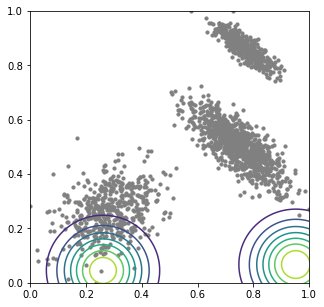

In [10]:
K = 3
maxIter = 10 # 최대 몇번 iteration을 반복할건지

# initial parameter
D,N = X.shape

pi = np.random.rand(K)
pi = pi / np.sum(pi)
mu = np.random.rand(D,K)
sigma = np.zeros((D,D,K))
for k in range(0,K):
    sigma[:,:,k] = 1e-2*np.identity(D)
    
# initialize
Num = np.zeros(K)
sigma = np.zeros((D,D,K))

# normalization
Xmin = np.min(X, axis = 1)
Xmax = np.max(X, axis = 1)
X = (X - np.matlib.repmat(Xmin.reshape(-1,1), 1, N)) / np.matlib.repmat((Xmax - Xmin).reshape(-1,1), 1, N)

# draw contour
u = np.linspace(-2,5,1000)
v = np.linspace(-2,5,1000)
uu, vv = np.meshgrid(u, v)
mog_pdf = np.zeros(uu.shape)
for k in range(0,K):
    pdf = multivariate_normal.pdf(np.hstack((uu.reshape(-1,1),vv.reshape(-1,1))), mean = mu[:,k], cov = sigma[:,:,k])
    mog_pdf += pi[k] * pdf.reshape(1000,1000)

plt.figure(figsize = (5,5))
plt.scatter(X[0,:],X[1,:],s = 10,color = "gray")
plt.contour(uu,vv,mog_pdf)
plt.xlim([np.min(X[0,:]),np.max(X[0,:])])
plt.ylim([np.min(X[1,:]),np.max(X[1,:])])

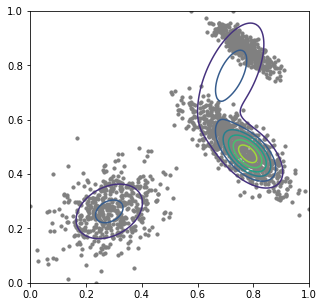

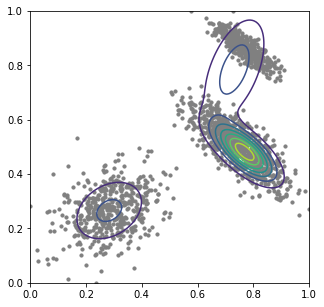

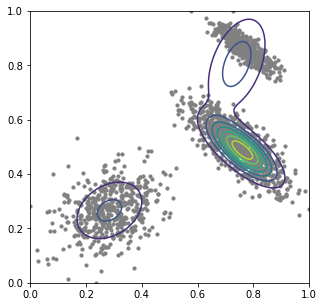

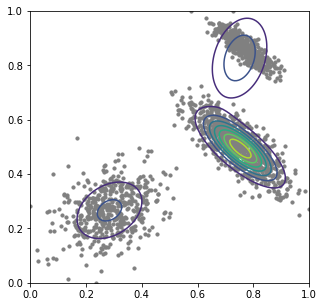

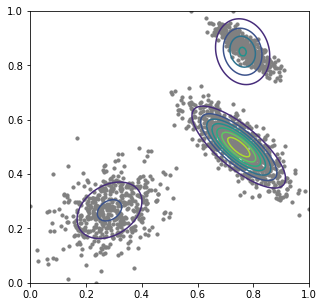

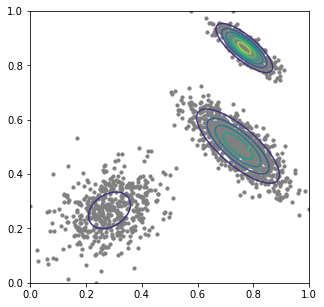

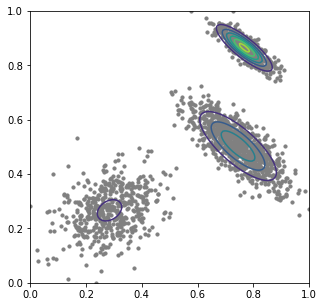

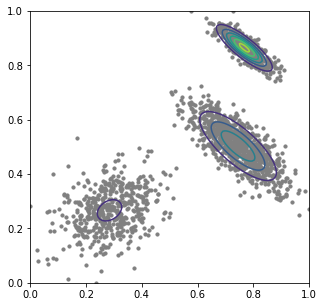

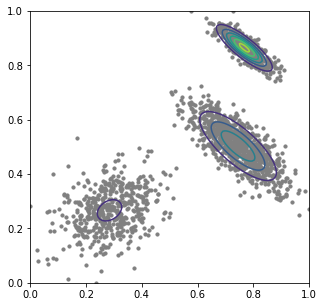

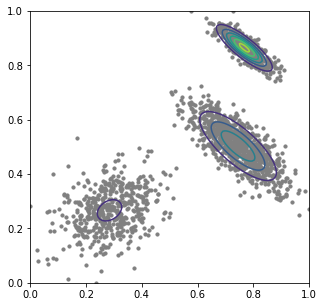

In [11]:
for iter in range(0, maxIter):

    # responsibility
    gamma = np.zeros((K,N))
    for k in range(0,K):
        gamma[k,:] = pi[k]*multivariate_normal.pdf(X.T,mean = mu[:,k], cov = sigma[:,:,k])
    gamma = gamma / np.sum(gamma,axis = 0)

    # iteration
    for k in range(0,K):
        Num[k] = np.sum(gamma[k,:])

        mu[:,k] = np.sum(np.matlib.repmat(gamma[k,:], D, 1)*X, axis = 1) / Num[k]

        res = (X - np.matlib.repmat(mu[:,k].reshape(D,1),1,N))
        gamma_res = np.matlib.repmat(gamma[k,:].reshape(1,N),D,1) * res
        for n in range(0,N):
            sigma[:,:,k] += res[:,n].reshape(-1,1).dot(gamma_res[:,n].reshape(-1,1).T)
        sigma[:,:,k] /= Num[k]

        pi[k] = Num[k] / N

    # draw contour
    mog_pdf = np.zeros(uu.shape)
    for k in range(0,K):
        pdf = multivariate_normal.pdf(np.hstack((uu.reshape(-1,1),vv.reshape(-1,1))), mean = mu[:,k], cov = sigma[:,:,k])
        mog_pdf += pi[k] * pdf.reshape(1000,1000)

    plt.figure(figsize = (5,5))
    plt.scatter(X[0,:],X[1,:],s = 10,color = "gray")
    plt.contour(uu,vv,mog_pdf)
    plt.xlim([np.min(X[0,:]),np.max(X[0,:])])
    plt.ylim([np.min(X[1,:]),np.max(X[1,:])])    

(0.0, 1.0)

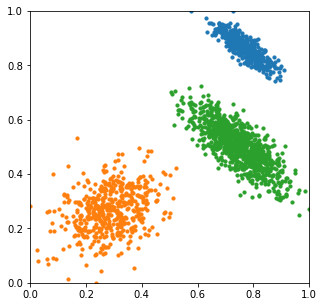

In [23]:
label = np.argmax(gamma, axis = 0)

plt.figure(figsize = (5,5))
for k in range(0,K):
    plt.scatter(X[0,label == k],X[1,label == k],s = 10)
plt.xlim([np.min(X[0,:]),np.max(X[0,:])])
plt.ylim([np.min(X[1,:]),np.max(X[1,:])])

(0.0, 1.0)

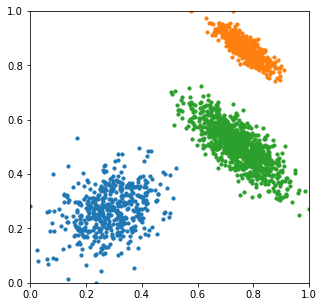

In [22]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components = K)
labels = model.fit_predict(X.T)

plt.figure(figsize = (5,5))
for k in range(0,K):
    plt.scatter(X[0,labels == k],X[1,labels == k],s = 10)
plt.xlim([np.min(X[0,:]),np.max(X[0,:])])
plt.ylim([np.min(X[1,:]),np.max(X[1,:])])